<a href="https://colab.research.google.com/github/SHIVAM-CS/Codsoft/blob/main/4_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODSOFT INTERNSHIP
**CREDIT CARD FRAUD DETECTION**


NAME : SHIVAM

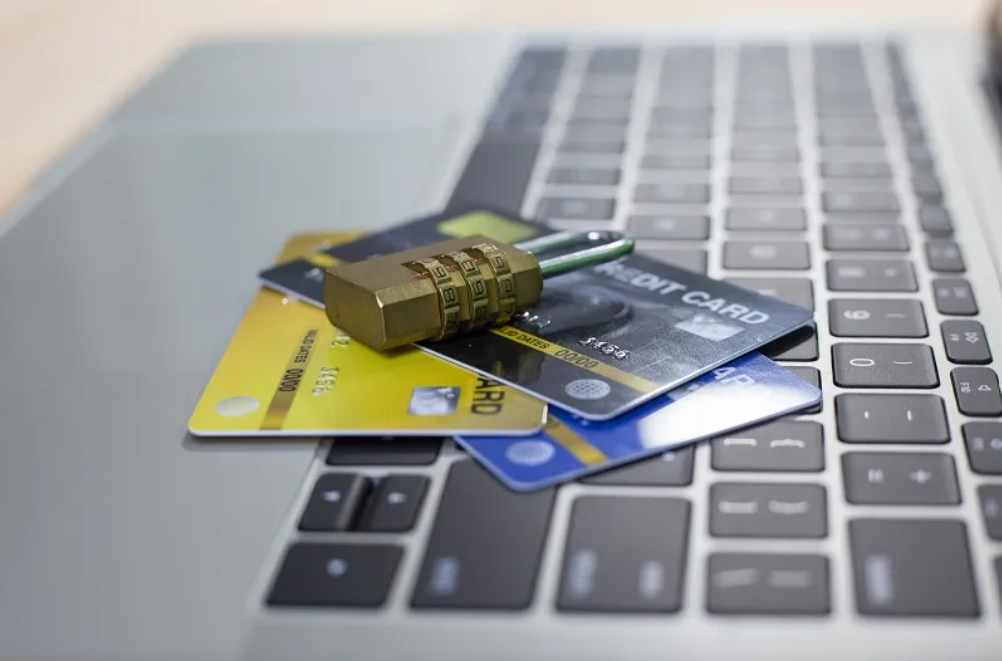

**IMPORTING LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as ans

In [ ]:
data=pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0
3972,3624,-0.663445,1.162921,1.508050,0.549405,0.231377,-0.106041,0.817977,-0.387026,1.488054,...,-0.420337,-0.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(3973, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

**DATA PREPROCESSING**

In [ ]:
data['V15'].fillna(data['V15'].mean(),inplace=True)

In [ ]:
data.loc[:,'V16':'V28']=data.loc[:,'V15':'V28'].fillna(data.loc[:,'V15':'V28'].mean())

In [ ]:
data['Amount'].fillna(data['Amount'].mean(),inplace=True)
data['Class'].fillna(data['Class'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data['Class'].value_counts()

0.0    3971
1.0       2
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

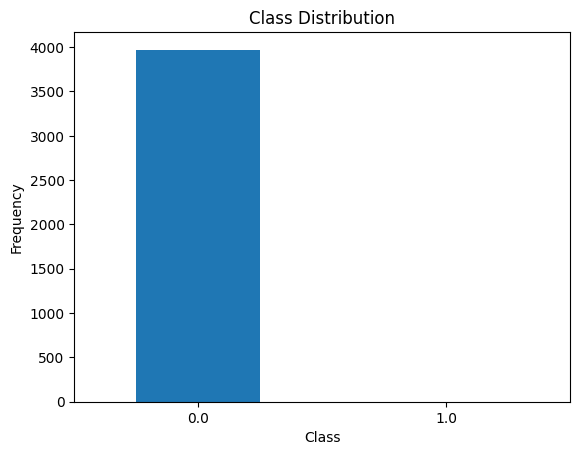

In [ ]:
count_class = pd.value_counts(data['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

0 --> Normal Transactions
1 --> Fraudinal Transactions

**DATA ANALYSIS**

In [ ]:
Legit=data[data['Class']==0]
Fraud=data[data['Class']==1]

In [ ]:
Legit.Amount.describe()

count    3971.000000
mean       64.899622
std       213.585665
min         0.000000
25%         2.270000
50%        12.990000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
Fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [ ]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1639.328381,-0.332543,0.309150,0.837615,0.011568,-0.029403,0.053490,0.147526,-0.071721,0.056572,...,0.059639,0.010174,-0.083028,-0.058743,0.029114,0.095244,-0.012637,0.044658,0.002668,64.899622
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


**UNDER SAMPLING**

In [ ]:
legit_sample = Legit.sample(n=156)

In [ ]:
new_data=pd.concat([legit_sample,Fraud],axis=0)

In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3962,3593,-1.415249,0.761709,2.092978,0.053672,-0.077621,1.985255,-1.093342,-2.378442,0.648919,...,-1.599571,-0.054824,-0.243945,-0.993574,0.321685,0.334487,-0.364029,-0.150066,23.41,0.0
3660,3133,-1.908311,-0.795196,2.050385,3.229058,1.068375,-0.698379,-0.355069,-0.022615,-0.967309,...,-0.096622,0.024728,-0.143417,0.537470,-0.628553,0.025603,0.370612,-0.090267,144.38,0.0
349,259,-0.942940,0.206074,1.625992,1.108392,0.875838,-1.215716,0.271173,-0.089238,-0.755539,...,0.150838,0.188497,-0.148637,0.407170,0.644707,-0.193470,-0.028920,0.005323,20.17,0.0
3847,3378,-0.348793,0.548283,0.516763,-2.515427,1.043894,0.059180,0.937151,-0.047746,0.723585,...,0.045786,0.498583,-0.442286,-1.347136,0.138256,-0.741538,0.247152,-0.041916,1.00,0.0
3267,2815,1.247961,0.207032,0.263103,0.714686,-0.542905,-1.116738,-0.035786,-0.098167,0.316230,...,-0.306994,-0.985486,0.148735,0.294170,0.151250,0.100309,-0.036021,0.027420,5.38,0.0


In [ ]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1509,1175,-0.740756,0.375207,0.836767,-0.315216,0.895750,1.666168,1.040892,0.516526,-1.043534,...,-0.106032,-0.529084,0.423894,-1.403581,-0.469163,0.070848,0.017607,0.035567,142.42,0.0
260,183,-0.598071,1.264137,1.410326,1.695175,0.391728,0.192576,1.118221,-0.050613,-1.716967,...,0.142545,0.317851,-0.199074,0.014307,0.150580,-0.015710,-0.071642,0.034371,75.83,0.0
2705,2246,-0.102731,0.627429,0.947061,-0.864277,0.277121,-1.554804,1.442490,-0.591806,-0.415584,...,-0.246072,-0.647594,0.405373,0.727593,-1.414347,0.212162,-0.057315,0.005054,46.99,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [ ]:
new_data['Class'].value_counts()

0.0    156
1.0      2
Name: Class, dtype: int64

In [ ]:
new_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1652.435897,-0.425710,0.493135,0.917600,0.005651,0.010480,0.202449,0.075532,-0.185078,-0.041059,...,0.084887,-0.035741,-0.108565,-0.056086,-0.036234,0.051168,-0.010159,0.072960,0.011006,47.974808
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


*Splitting the data into Features & Targets*

In [ ]:
X=new_data.drop(columns='Class',axis=1)
Y=new_data['Class']

*Train & Test*

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify= Y,random_state=2)

In [ ]:
print(X.shape,x_train.shape,x_test.shape)

(158, 30) (126, 30) (32, 30)


**MODEL TRAINING**

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**ACCURACY SCORE**

In [ ]:
X_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_predict,y_train)

print("Accuracy Score of Training Data:{}".format(training_data_accuracy))

Accuracy Score of Training Data:1.0


In [ ]:
X_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_predict,y_test)

print("Accuracy Score of Test Data:{}".format(test_data_accuracy))

Accuracy Score of Test Data:1.0


**PRECISON SCORE**

In [ ]:
from sklearn.metrics import precision_score
X_train_predict = model.predict(x_train)
training_data_precision_score = precision_score(X_train_predict,y_train)
print("Precison Score of Training Data :{}".format((training_data_precision_score)))

Precison Score of Training Data :1.0


In [ ]:
X_test_predict = model.predict(x_test)
precision = precision_score(y_test, X_test_predict, zero_division='warn')
print("Precison Score of Test Data :{}".format((precision)))

Precison Score of Test Data :0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RECALL**

In [ ]:
from sklearn.metrics import recall_score
X_train_predict = model.predict(x_train)
training_data_recall_score = recall_score(X_train_predict,y_train)
print("Recall Score of Training Data :{}".format((training_data_recall_score)))

Recall Score of Training Data :1.0


In [ ]:
X_test_predict = model.predict(x_test)
test_data_accuracy = recall_score(X_test_predict,y_test)

print("Recall Score of Test Data:{}".format(test_data_accuracy))

Recall Score of Test Data:0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
